In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

# Download and Prep Concept Data

In [2]:

# Version 2
#concept_data = pd.read_excel(r"J:\DataScience\Estimates&Forecasts\SR15 Forecast\SR15_CCM\CCM_OutputData\DataToEconTeam\DataToEconTeam05092023\Household_ characteristics_2020_2060_05092023.xlsx", sheet_name="data")

# Version 3
concept_data = pd.read_excel(r"J:\DataScience\Estimates&Forecasts\SR15 Forecast\SR15_CCM\CCM_OutputData\DataToEconTeam\DataToEconTeam07072023\Household_ characteristics_2020_2060_forQA_07072023.xlsx", sheet_name="data")
concept_data

,year,race,sex,age,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF
0,2020,AIAN_NH,F,0,73,0,0,0,0,0
1,2020,AIAN_NH,F,1,55,0,0,0,0,0
2,2020,AIAN_NH,F,2,55,0,0,0,0,0
3,2020,AIAN_NH,F,3,74,0,0,0,0,0
4,2020,AIAN_NH,F,4,91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,M,106,7,0,5,0,5,0
63710,2060,White_NH,M,107,4,0,3,0,3,0
63711,2060,White_NH,M,108,2,0,1,0,1,0
63712,2060,White_NH,M,109,1,0,1,0,1,0


In [3]:
age_bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, float('inf')]
age_labels = ['Under 10', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80+']
concept_data['age group'] = pd.cut(concept_data['age'], bins=age_bins, labels=age_labels)
concept_data

,year,race,sex,age,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF,age group
0,2020,AIAN_NH,F,0,73,0,0,0,0,0,Under 10
1,2020,AIAN_NH,F,1,55,0,0,0,0,0,Under 10
2,2020,AIAN_NH,F,2,55,0,0,0,0,0,Under 10
3,2020,AIAN_NH,F,3,74,0,0,0,0,0,Under 10
4,2020,AIAN_NH,F,4,91,0,0,0,0,0,Under 10
...,...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,M,106,7,0,5,0,5,0,80+
63710,2060,White_NH,M,107,4,0,3,0,3,0,80+
63711,2060,White_NH,M,108,2,0,1,0,1,0,80+
63712,2060,White_NH,M,109,1,0,1,0,1,0,80+


In [4]:
concept_data['sex'] = concept_data['sex'].replace({'F': 'Female', 'M': 'Male'})
concept_data

,year,race,sex,age,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF,age group
0,2020,AIAN_NH,Female,0,73,0,0,0,0,0,Under 10
1,2020,AIAN_NH,Female,1,55,0,0,0,0,0,Under 10
2,2020,AIAN_NH,Female,2,55,0,0,0,0,0,Under 10
3,2020,AIAN_NH,Female,3,74,0,0,0,0,0,Under 10
4,2020,AIAN_NH,Female,4,91,0,0,0,0,0,Under 10
...,...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,Male,106,7,0,5,0,5,0,80+
63710,2060,White_NH,Male,107,4,0,3,0,3,0,80+
63711,2060,White_NH,Male,108,2,0,1,0,1,0,80+
63712,2060,White_NH,Male,109,1,0,1,0,1,0,80+


In [5]:
concept_data['non_gq_pop'] = concept_data['control_pop'] - concept_data['gq_pop']
concept_data

,year,race,sex,age,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF,age group,non_gq_pop
0,2020,AIAN_NH,Female,0,73,0,0,0,0,0,Under 10,73
1,2020,AIAN_NH,Female,1,55,0,0,0,0,0,Under 10,55
2,2020,AIAN_NH,Female,2,55,0,0,0,0,0,Under 10,55
3,2020,AIAN_NH,Female,3,74,0,0,0,0,0,Under 10,74
4,2020,AIAN_NH,Female,4,91,0,0,0,0,0,Under 10,91
...,...,...,...,...,...,...,...,...,...,...,...,...
63709,2060,White_NH,Male,106,7,0,5,0,5,0,80+,7
63710,2060,White_NH,Male,107,4,0,3,0,3,0,80+,4
63711,2060,White_NH,Male,108,2,0,1,0,1,0,80+,2
63712,2060,White_NH,Male,109,1,0,1,0,1,0,80+,1


# Check 2

In [13]:
check_2 = concept_data[['year', 'control_pop']]
check_2 = check_2.groupby('year').sum()
check_2.columns = ['CONCEP_pop']
check_2

,CONCEP_pop
year,
2020,3331279
2021,3288503
2022,3287306
2023,3281942
2024,3286406
2025,3292330
2026,3302237
2027,3311916
2028,3322644


In [12]:
# Downloading DOF Data - Purva sent this to the group on 7/11
dof_data = pd.read_excel(r'Data\dof_projections.xlsx', usecols=['startyr', 'finalpop'])
dof_data.columns = ['year', 'dof_pop']
dof_data = dof_data.set_index('year')
dof_data

,dof_pop
year,
2018,3294272
2019,3301513
2020,3284368
2021,3279493
2022,3293163
2023,3306841
2024,3320866
2025,3333278
2026,3344546


In [18]:
# Merge the data together 
check_2_merge = check_2.merge(dof_data, how='left', left_index=True, right_index=True)
check_2_merge['Diff'] = check_2_merge['CONCEP_pop'] - check_2_merge['dof_pop']
check_2_merge['pct_diff'] = round((check_2_merge['CONCEP_pop'] - check_2_merge['dof_pop'])/check_2_merge['dof_pop']*100, 2)


#check_2_merge.to_excel(r'Data\CONCEP_dof_comparison.xlsx', index=True)

check_2_merge

# Check 7 Prep

In [6]:
concept_data.columns

Index(['race', 'sex', 'age', 'year', 'control_pop', 'gq_pop', 'households',
       'WithKids', 'AnySenior', 'HouseholderLF', 'age group', 'non_gq_pop'],
      dtype='object')

In [8]:
check_7 = concept_data[['year', 'non_gq_pop', 'gq_pop', 'households']]
#check_7.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_7.xlsx', index=False)
check_7

,year,non_gq_pop,gq_pop,households
0,2020,73,0,0
1,2020,55,0,0
2,2020,55,0,0
3,2020,74,0,0
4,2020,91,0,0
...,...,...,...,...
63709,2060,7,0,5
63710,2060,4,0,3
63711,2060,2,0,1
63712,2060,1,0,1


# Check 8 Prep

In [10]:
check_eight_prep = concept_data[['year', 'age group', 'sex', 'race', 'non_gq_pop', 'gq_pop']]
check_eight_prep = check_eight_prep.groupby(['year', 'age group', 'sex', 'race']).sum().reset_index()
#check_eight_prep.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_8.xlsx', index=False)

check_eight_prep

,year,age group,sex,race,non_gq_pop,gq_pop
0,2020,Under 10,Female,AIAN_NH,686,0
1,2020,Under 10,Female,Asian_NH,19580,0
2,2020,Under 10,Female,Black_NH,8622,0
3,2020,Under 10,Female,Hispanic,89372,2
4,2020,Under 10,Female,Multi-Race NH,17863,0
...,...,...,...,...,...,...
5161,2060,80+,Male,Black_NH,2347,342
5162,2060,80+,Male,Hispanic,29282,1741
5163,2060,80+,Male,Multi-Race NH,3684,196
5164,2060,80+,Male,NHPI_NH,871,28


# Check 9 Prep

In [12]:
check_nine_prep = concept_data[['year', 'age group', 'control_pop']]
check_nine_prep = check_nine_prep.groupby(['year', 'age group']).sum().reset_index()
#check_nine_prep.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_9.xlsx', index=False)

check_nine_prep

,year,age group,control_pop
0,2020,Under 10,420670
1,2020,10 to 19,441310
2,2020,20 to 29,504142
3,2020,30 to 39,468378
4,2020,40 to 49,415918
...,...,...,...
364,2060,40 to 49,403063
365,2060,50 to 59,384806
366,2060,60 to 69,370457
367,2060,70 to 79,315492


# Check 10 Prep

In [14]:
check_ten_prep = concept_data[['year', 'sex', 'control_pop']]
check_ten_prep = check_ten_prep.groupby(['year', 'sex']).sum().reset_index()
#check_ten_prep.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_10.xlsx', index=False)

check_ten_prep

,year,sex,control_pop
0,2020,Female,1654577
1,2020,Male,1676702
2,2021,Female,1637289
3,2021,Male,1651214
4,2022,Female,1640181
...,...,...,...
77,2058,Male,1581012
78,2059,Female,1686018
79,2059,Male,1576802
80,2060,Female,1682753


# Check 11 Prep

In [16]:
check_eleven_prep = concept_data[['year', 'race', 'control_pop']]
check_eleven_prep = check_eleven_prep.groupby(['year', 'race']).sum().reset_index()
#check_eleven_prep.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_11.xlsx', index=False)

check_eleven_prep

,year,race,control_pop
0,2020,AIAN_NH,12964
1,2020,Asian_NH,404547
2,2020,Black_NH,146442
3,2020,Hispanic,1130717
4,2020,Multi-Race NH,168893
...,...,...,...
282,2060,Black_NH,131424
283,2060,Hispanic,1107508
284,2060,Multi-Race NH,153484
285,2060,NHPI_NH,19634


# Check 12 Prep

In [18]:
concept_data['WithoutKids'] = concept_data['households'] - concept_data['WithKids']
check_12 = concept_data[['year', 'WithKids', 'WithoutKids']]
check_12 = check_12.groupby('year').sum()
#check_12.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_12.xlsx', index=True)

check_12

,WithKids,WithoutKids
year,,
2020,371497,772773
2021,368582,780124
2022,372357,788115
2023,362425,812170
2024,364453,821071
2025,365770,829032
2026,367241,836917
2027,368890,843727
2028,370790,850311


# Check 13 Prep

In [21]:
concept_data['WithoutSenior'] = concept_data['households'] - concept_data['AnySenior']
check_13 = concept_data[['year', 'AnySenior', 'WithoutSenior']]
check_13 = check_13.groupby('year').sum()
#check_13.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_13.xlsx', index=True)
check_13


,AnySenior,WithoutSenior
year,,
2020,343295,800975
2021,352731,795975
2022,362516,797956
2023,375293,799302
2024,385750,799774
2025,396368,798434
2026,405799,798359
2027,415016,797601
2028,423958,797143


# Check 14 Prep

In [38]:
concept_data.columns

Index(['year', 'race', 'sex', 'age', 'control_pop', 'gq_pop', 'households',
       'WithKids', 'AnySenior', 'HouseholderLF', 'age group', 'non_gq_pop',
       'WithoutKids', 'WithoutSenior'],
      dtype='object')

In [23]:
check_14 = concept_data[['year', 'HouseholderLF']]
check_14 = check_14.groupby('year').sum()
#check_14.to_excel(r'C:\Users\cra\San Diego Association of Governments\SANDAG QA QC - Documents\Projects\2023\2023-040 CCM Forecast Output (series 15)\Results\2020-2060\Version 2\check_13.xlsx', index=True)
check_14

,HouseholderLF
year,
2020,768402
2021,764608
2022,768018
2023,771003
2024,772537
2025,773180
2026,773746
2027,774122
2028,774726


# CRA Checks

### Households with and without children and total households

In [9]:
concept_data.columns
concept_data['without_kids'] = concept_data['households'] - concept_data['WithKids']
concept_data

,race,sex,age,year,control_pop,gq_pop,households,WithKids,AnySenior,HouseholderLF,age group,non_gq_pop,without_kids
0,AIAN_NH,Female,0,2020,73,0,0,0,0,0,Under 10,73,0
1,AIAN_NH,Female,1,2020,55,0,0,0,0,0,Under 10,55,0
2,AIAN_NH,Female,2,2020,55,0,0,0,0,0,Under 10,55,0
3,AIAN_NH,Female,3,2020,74,0,0,0,0,0,Under 10,74,0
4,AIAN_NH,Female,4,2020,91,0,0,0,0,0,Under 10,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63709,White_NH,Male,106,2060,7,0,5,0,5,0,80+,7,5
63710,White_NH,Male,107,2060,4,0,3,0,3,0,80+,4,3
63711,White_NH,Male,108,2060,2,0,1,0,1,0,80+,2,1
63712,White_NH,Male,109,2060,1,0,1,0,1,0,80+,1,1


## Check 12 

In [10]:
check_13_data = concept_data[['year', 'WithKids', 'without_kids']]
check_13_data = check_13_data.groupby('year').sum().reset_index()
check_13_data['WithKids_pct_change'] = check_13_data['WithKids'].pct_change()
check_13_data['without_kids_pct_change'] = check_13_data['without_kids'].pct_change()
check_13_data['WithKids_distribution'] = round(check_13_data['WithKids'] / (check_13_data['WithKids']+check_13_data['without_kids'])*100, 2)
check_13_data['without_kids_distribution'] = round(check_13_data['without_kids'] / (check_13_data['WithKids']+check_13_data['without_kids'])*100, 2)
check_13_data

,year,WithKids,without_kids,WithKids_pct_change,without_kids_pct_change,WithKids_distribution,without_kids_distribution
0,2020,371497,772773,NaN,NaN,32.47,67.53
1,2021,368582,780124,-0.007847,0.009512,32.09,67.91
2,2022,372357,788115,0.010242,0.010243,32.09,67.91
3,2023,362425,812170,-0.026673,0.030522,30.86,69.14
4,2024,364453,821071,0.005596,0.010960,30.74,69.26
5,2025,365770,829032,0.003614,0.009696,30.61,69.39
6,2026,367241,836917,0.004022,0.009511,30.50,69.50
7,2027,368890,843727,0.004490,0.008137,30.42,69.58
8,2028,370790,850311,0.005151,0.007803,30.37,69.63
9,2029,371581,856433,0.002133,0.007200,30.26,69.74


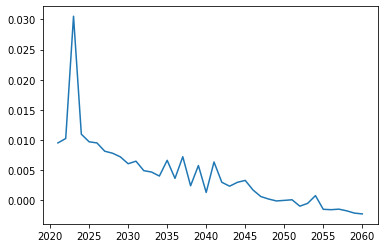

In [11]:
plt.plot(check_13_data['year'], check_13_data['without_kids_pct_change'], label='Example Line')

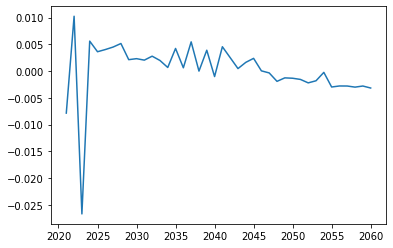

In [12]:
plt.plot(check_13_data['year'], check_13_data['WithKids_pct_change'], label='Example Line')

## Check 11

In [14]:
check_11_data = concept_data[['year', 'race', 'control_pop']]



check_11_data = check_11_data.groupby(['year', 'race']).sum().reset_index()
check_11_data['year_total'] = check_11_data.groupby('year')['control_pop'].transform('sum')
check_11_data['year_percent'] = round(check_11_data['control_pop'] / check_11_data['year_total']*100, 2)
check_11_data['race_population_pct_change'] = check_11_data.groupby('race')['control_pop'].pct_change()
check_11_data['race_percent_pct_change'] = check_11_data.groupby('race')['year_percent'].pct_change()


check_11_data

,year,race,control_pop,year_total,year_percent,race_population_pct_change,race_percent_pct_change
0,2020,AIAN_NH,12964,3331279,0.39,NaN,NaN
1,2020,Asian_NH,404547,3331279,12.14,NaN,NaN
2,2020,Black_NH,146442,3331279,4.40,NaN,NaN
3,2020,Hispanic,1130717,3331279,33.94,NaN,NaN
4,2020,Multi-Race NH,168893,3331279,5.07,NaN,NaN
...,...,...,...,...,...,...,...
282,2060,Black_NH,131424,3255193,4.04,-0.003548,0.000000
283,2060,Hispanic,1107508,3255193,34.02,-0.003664,-0.001468
284,2060,Multi-Race NH,153484,3255193,4.72,-0.002379,0.000000
285,2060,NHPI_NH,19634,3255193,0.60,0.003322,0.000000


In [15]:
check_11_data.describe()

,year,control_pop,year_total,year_percent,race_population_pct_change,race_percent_pct_change
count,287.000000,2.870000e+02,2.870000e+02,287.000000,280.000000,280.000000
mean,2040.000000,4.746935e+05,3.322855e+06,14.285749,0.001085,0.001708
std,11.852827,5.100608e+05,3.151180e+04,15.348168,0.006955,0.007821
min,2020.000000,1.163800e+04,3.255193e+06,0.360000,-0.019308,-0.027027
25%,2030.000000,1.886900e+04,3.295990e+06,0.570000,-0.003102,-0.002338
50%,2040.000000,1.586010e+05,3.328382e+06,4.720000,-0.001383,0.000000
75%,2050.000000,1.128638e+06,3.352380e+06,34.260000,0.003629,0.000291
max,2060.000000,1.454591e+06,3.361284e+06,43.660000,0.021625,0.025641


### Comparison with series 14

In [16]:
import pyodbc

In [17]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                    'Server=DDAMWSQL16.sandag.org;'
                    'Database=estimates;'
                    'Trusted_Connection=yes;')

with open(rf'ethnicity_query.sql', 'r') as sql_file:
    sql_query = sql_file.read()

df =  pd.read_sql_query(sql_query, conn)
df

,yr_id,long_name,population
0,2025,Hispanic,1171494
1,2035,"Non-Hispanic, Asian",583877
2,2018,"Non-Hispanic, American Indian or Alaska Native",21780
3,2040,"Non-Hispanic, White",1310507
4,2016,Hispanic,1133247
...,...,...,...
67,2018,"Non-Hispanic, Two or More Races",108301
68,2016,"Non-Hispanic, Black",147802
69,2025,"Non-Hispanic, Hawaiian or Pacific Islander",14442
70,2025,"Non-Hispanic, American Indian or Alaska Native",23405


In [18]:
pivoted_series14_data = pd.pivot_table(df, values ='population', index =['yr_id'],
                         columns =['long_name'], aggfunc = np.sum)
pivoted_series14_data['Non-Hispanic, White'] = pivoted_series14_data['Non-Hispanic, White'] + pivoted_series14_data['Non-Hispanic, Other']
pivoted_series14_data = pivoted_series14_data.drop('Non-Hispanic, Other', axis=1)
pivoted_series14_data

long_name,Hispanic,"Non-Hispanic, American Indian or Alaska Native","Non-Hispanic, Asian","Non-Hispanic, Black","Non-Hispanic, Hawaiian or Pacific Islander","Non-Hispanic, Two or More Races","Non-Hispanic, White"
yr_id,,,,,,,
2016,1133247,15013,359333,147802,14569,110607,1528939
2018,1093476,21780,428237,168467,14271,108301,1518904
2020,1110869,22212,447328,168837,14281,111771,1508656
2025,1171494,23405,495065,169421,14442,121859,1475162
2030,1238717,24461,540713,169354,14583,132110,1432547
2035,1303640,25475,583877,168652,14575,142199,1381930
2040,1369592,26525,626972,166946,14456,151599,1320086
2045,1432019,27360,669180,164404,14195,160536,1251994
2050,1485517,27975,708905,160422,13945,168435,1180877


In [19]:
years_in_database = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
pivoted_series14_data = pivoted_series14_data.loc[years_in_database]
pivoted_series14_data

long_name,Hispanic,"Non-Hispanic, American Indian or Alaska Native","Non-Hispanic, Asian","Non-Hispanic, Black","Non-Hispanic, Hawaiian or Pacific Islander","Non-Hispanic, Two or More Races","Non-Hispanic, White"
yr_id,,,,,,,
2020,1110869,22212,447328,168837,14281,111771,1508656
2025,1171494,23405,495065,169421,14442,121859,1475162
2030,1238717,24461,540713,169354,14583,132110,1432547
2035,1303640,25475,583877,168652,14575,142199,1381930
2040,1369592,26525,626972,166946,14456,151599,1320086
2045,1432019,27360,669180,164404,14195,160536,1251994
2050,1485517,27975,708905,160422,13945,168435,1180877


In [20]:
check_11_data = concept_data[['year', 'race', 'control_pop']]
check_11_data['race_long_name'] = check_11_data['race'].replace({
            'AIAN_NH': 'Non-Hispanic, American Indian or Alaska Native', 
            'Asian_NH': 'Non-Hispanic, Asian', 
            'Black_NH': 'Non-Hispanic, Black', 
            'Hispanic': 'Hispanic', 
            'Multi-Race NH': 'Non-Hispanic, Two or More Races', 
            'NHPI_NH': 'Non-Hispanic, Hawaiian or Pacific Islander', 
            'White_NH': 'Non-Hispanic, White'})
check_11_data

C:\Users\cra\AppData\Local\Temp\ipykernel_21256\3242570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_11_data['race_long_name'] = check_11_data['race'].replace({


,year,race,control_pop,race_long_name
0,2020,AIAN_NH,73,"Non-Hispanic, American Indian or Alaska Native"
1,2020,AIAN_NH,55,"Non-Hispanic, American Indian or Alaska Native"
2,2020,AIAN_NH,55,"Non-Hispanic, American Indian or Alaska Native"
3,2020,AIAN_NH,74,"Non-Hispanic, American Indian or Alaska Native"
4,2020,AIAN_NH,91,"Non-Hispanic, American Indian or Alaska Native"
...,...,...,...,...
63709,2060,White_NH,7,"Non-Hispanic, White"
63710,2060,White_NH,4,"Non-Hispanic, White"
63711,2060,White_NH,2,"Non-Hispanic, White"
63712,2060,White_NH,1,"Non-Hispanic, White"


In [21]:
check_11_data_pivot = pd.pivot_table(check_11_data, values ='control_pop', index =['year'],
                         columns =['race_long_name'], aggfunc = np.sum)

check_11_data_pivot = check_11_data_pivot.loc[years_in_database]
check_11_data_pivot#.to_excel('ccm_output.xlsx')

race_long_name,Hispanic,"Non-Hispanic, American Indian or Alaska Native","Non-Hispanic, Asian","Non-Hispanic, Black","Non-Hispanic, Hawaiian or Pacific Islander","Non-Hispanic, Two or More Races","Non-Hispanic, White"
year,,,,,,,
2020,1130717,12964,404547,146442,13125,168893,1454591
2025,1131889,12674,440687,142429,14027,162963,1394685
2030,1147833,12769,483586,142340,15183,161914,1377353
2035,1155657,12828,519095,141265,16285,160156,1353654
2040,1157656,12828,546913,139956,17295,158601,1327048
2045,1152527,12647,566639,137895,18158,157586,1297959
2050,1141445,12322,580999,135678,18815,156408,1272400


In [22]:
pivoted_series14_data#.to_excel('series14_data.xlsx')

long_name,Hispanic,"Non-Hispanic, American Indian or Alaska Native","Non-Hispanic, Asian","Non-Hispanic, Black","Non-Hispanic, Hawaiian or Pacific Islander","Non-Hispanic, Two or More Races","Non-Hispanic, White"
yr_id,,,,,,,
2020,1110869,22212,447328,168837,14281,111771,1508656
2025,1171494,23405,495065,169421,14442,121859,1475162
2030,1238717,24461,540713,169354,14583,132110,1432547
2035,1303640,25475,583877,168652,14575,142199,1381930
2040,1369592,26525,626972,166946,14456,151599,1320086
2045,1432019,27360,669180,164404,14195,160536,1251994
2050,1485517,27975,708905,160422,13945,168435,1180877


In [23]:
round((check_11_data_pivot - pivoted_series14_data)/pivoted_series14_data*100,2)

race_long_name,Hispanic,"Non-Hispanic, American Indian or Alaska Native","Non-Hispanic, Asian","Non-Hispanic, Black","Non-Hispanic, Hawaiian or Pacific Islander","Non-Hispanic, Two or More Races","Non-Hispanic, White"
year,,,,,,,
2020,1.79,-41.64,-9.56,-13.26,-8.09,51.11,-3.58
2025,-3.38,-45.85,-10.98,-15.93,-2.87,33.73,-5.46
2030,-7.34,-47.80,-10.57,-15.95,4.11,22.56,-3.85
2035,-11.35,-49.64,-11.10,-16.24,11.73,12.63,-2.05
2040,-15.47,-51.64,-12.77,-16.17,19.64,4.62,0.53
2045,-19.52,-53.78,-15.32,-16.12,27.92,-1.84,3.67
2050,-23.16,-55.95,-18.04,-15.42,34.92,-7.14,7.75


# Check 2

## P4 Comparison

In [24]:
# DOF Data from P4: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fdof.ca.gov%2Fwp-content%2Fuploads%2Fsites%2F352%2FForecasting%2FDemographics%2FDocuments%2FP4_HHProjections_B2019.xlsx&wdOrigin=BROWSELINK 
data = {
    'Year': ['Total Population', 'Household Population', 'Group Quarters', 'Total Households', 'PPH'],
    2020: [3370418, 3258008, 112410, 1159439, 2.81],
    2025: [3449997, 3334450, 115547, 1195337, 2.79]
}

df = pd.DataFrame(data)
df = df.set_index('Year')
df


,2020,2025
Year,,
Total Population,3370418.00,3449997.00
Household Population,3258008.00,3334450.00
Group Quarters,112410.00,115547.00
Total Households,1159439.00,1195337.00
PPH,2.81,2.79


In [25]:
check_2_data = concept_data[['year', 'control_pop', 'gq_pop', 'households']]
check_2_data = check_2_data[check_2_data['year'].isin([2010, 2015, 2020, 2025])]
check_2_data['non_gq_population'] = check_2_data['control_pop'] - check_2_data['gq_pop']
check_2_data

,year,control_pop,gq_pop,households,non_gq_population
0,2020,73,0,0,73
1,2020,55,0,0,55
2,2020,55,0,0,55
3,2020,74,0,0,74
4,2020,91,0,0,91
...,...,...,...,...,...
9319,2025,0,0,0,0
9320,2025,0,0,0,0
9321,2025,0,0,0,0
9322,2025,0,0,0,0


In [26]:
total_population = list(check_2_data.groupby('year')['control_pop'].sum())
household_population = list(check_2_data.groupby('year')['non_gq_population'].sum())
group_quarters = list(check_2_data.groupby('year')['gq_pop'].sum())

In [27]:
check_2_output = pd.DataFrame()
check_2_output['Total Population'] = list(check_2_data.groupby('year')['control_pop'].sum())
check_2_output['Household Population'] = list(check_2_data.groupby('year')['non_gq_population'].sum())
check_2_output['Group Quarters'] = list(check_2_data.groupby('year')['gq_pop'].sum())
check_2_output['Total Households'] = list(check_2_data.groupby('year')['households'].sum())
check_2_output['PPH'] = round(check_2_output['Household Population'] / check_2_output['Total Households'], 2)
check_2_output = check_2_output.T
check_2_output.columns = [2020, 2025]
check_2_output#.to_excel('ccm_p4.xlsx')

,2020,2025
Total Population,3331279.00,3299354.00
Household Population,3218869.00,3185955.00
Group Quarters,112410.00,113399.00
Total Households,1144270.00,1194802.00
PPH,2.81,2.67


In [28]:
((df - check_2_output)/check_2_output*100)#.to_excel('dof_ccm_p4_pct_diff.xlsx')

,2020,2025
Year,,
Total Population,1.174894,4.565833
Household Population,1.215924,4.660926
Group Quarters,0.000000,1.894197
Total Households,1.325649,0.044777
PPH,0.000000,4.494382


## P2 Comparison

In [49]:
p2_dof_data = pd.read_excel(r'C:\Users\cra\OneDrive - San Diego Association of Governments\QA_Repository\2023\2023-040 CCM Forecast Output (series 15)\P2A_County_Total.xlsx')
p2_dof_data = p2_dof_data.dropna(axis=1)
p2_dof_data = p2_dof_data.drop('Geography', axis=1)
p2_dof_data = p2_dof_data.T.reset_index()
p2_dof_data.columns = ['year', 'population_dof']
p2_dof_data['year'] = [int(x) for x in p2_dof_data['year']]
p2_dof_data

,year,population_dof
0,2010,3104732
1,2011,3141469
2,2012,3179970
3,2013,3212923
4,2014,3248917
5,2015,3275036
6,2016,3296528
7,2017,3315358
8,2018,3338877
9,2019,3346937


In [53]:
population_ccm_data = concept_data[['year', 'control_pop']]
population_ccm_data = population_ccm_data.groupby('year').sum()
population_ccm_data = population_ccm_data.reset_index()
population_ccm_data

,year,control_pop
0,2020,3331279
1,2021,3288503
2,2022,3287306
3,2023,3281942
4,2024,3288106
5,2025,3299354
6,2026,3308867
7,2027,3318848
8,2028,3328382
9,2029,3334900


In [57]:
p2_comparison = population_ccm_data.merge(p2_dof_data, how='left', on='year')
p2_comparison['Diff'] = p2_comparison['control_pop'] - p2_comparison['population_dof']
p2_comparison['Percent Diff'] = round((p2_comparison['control_pop'] - p2_comparison['population_dof'])/p2_comparison['population_dof']*100, 2)
p2_comparison#.to_excel('p2a_dof_ccm_pop_diff.xlsx', index=False)

In [58]:
p2_comparison

,year,control_pop,population_dof,Diff,Percent Diff
0,2020,3331279,3352145,-20866,-0.62
1,2021,3288503,3343827,-55324,-1.65
2,2022,3287306,3356185,-68879,-2.05
3,2023,3281942,3369636,-87694,-2.60
4,2024,3288106,3383663,-95557,-2.82
5,2025,3299354,3398922,-99568,-2.93
6,2026,3308867,3412460,-103593,-3.04
7,2027,3318848,3425725,-106877,-3.12
8,2028,3328382,3438361,-109979,-3.20
9,2029,3334900,3450124,-115224,-3.34
